In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kruskal
import pickle

In [2]:
data = pd.read_csv('C:/Users/vishesh/OneDrive/Desktop/parkinsons.csv')
data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


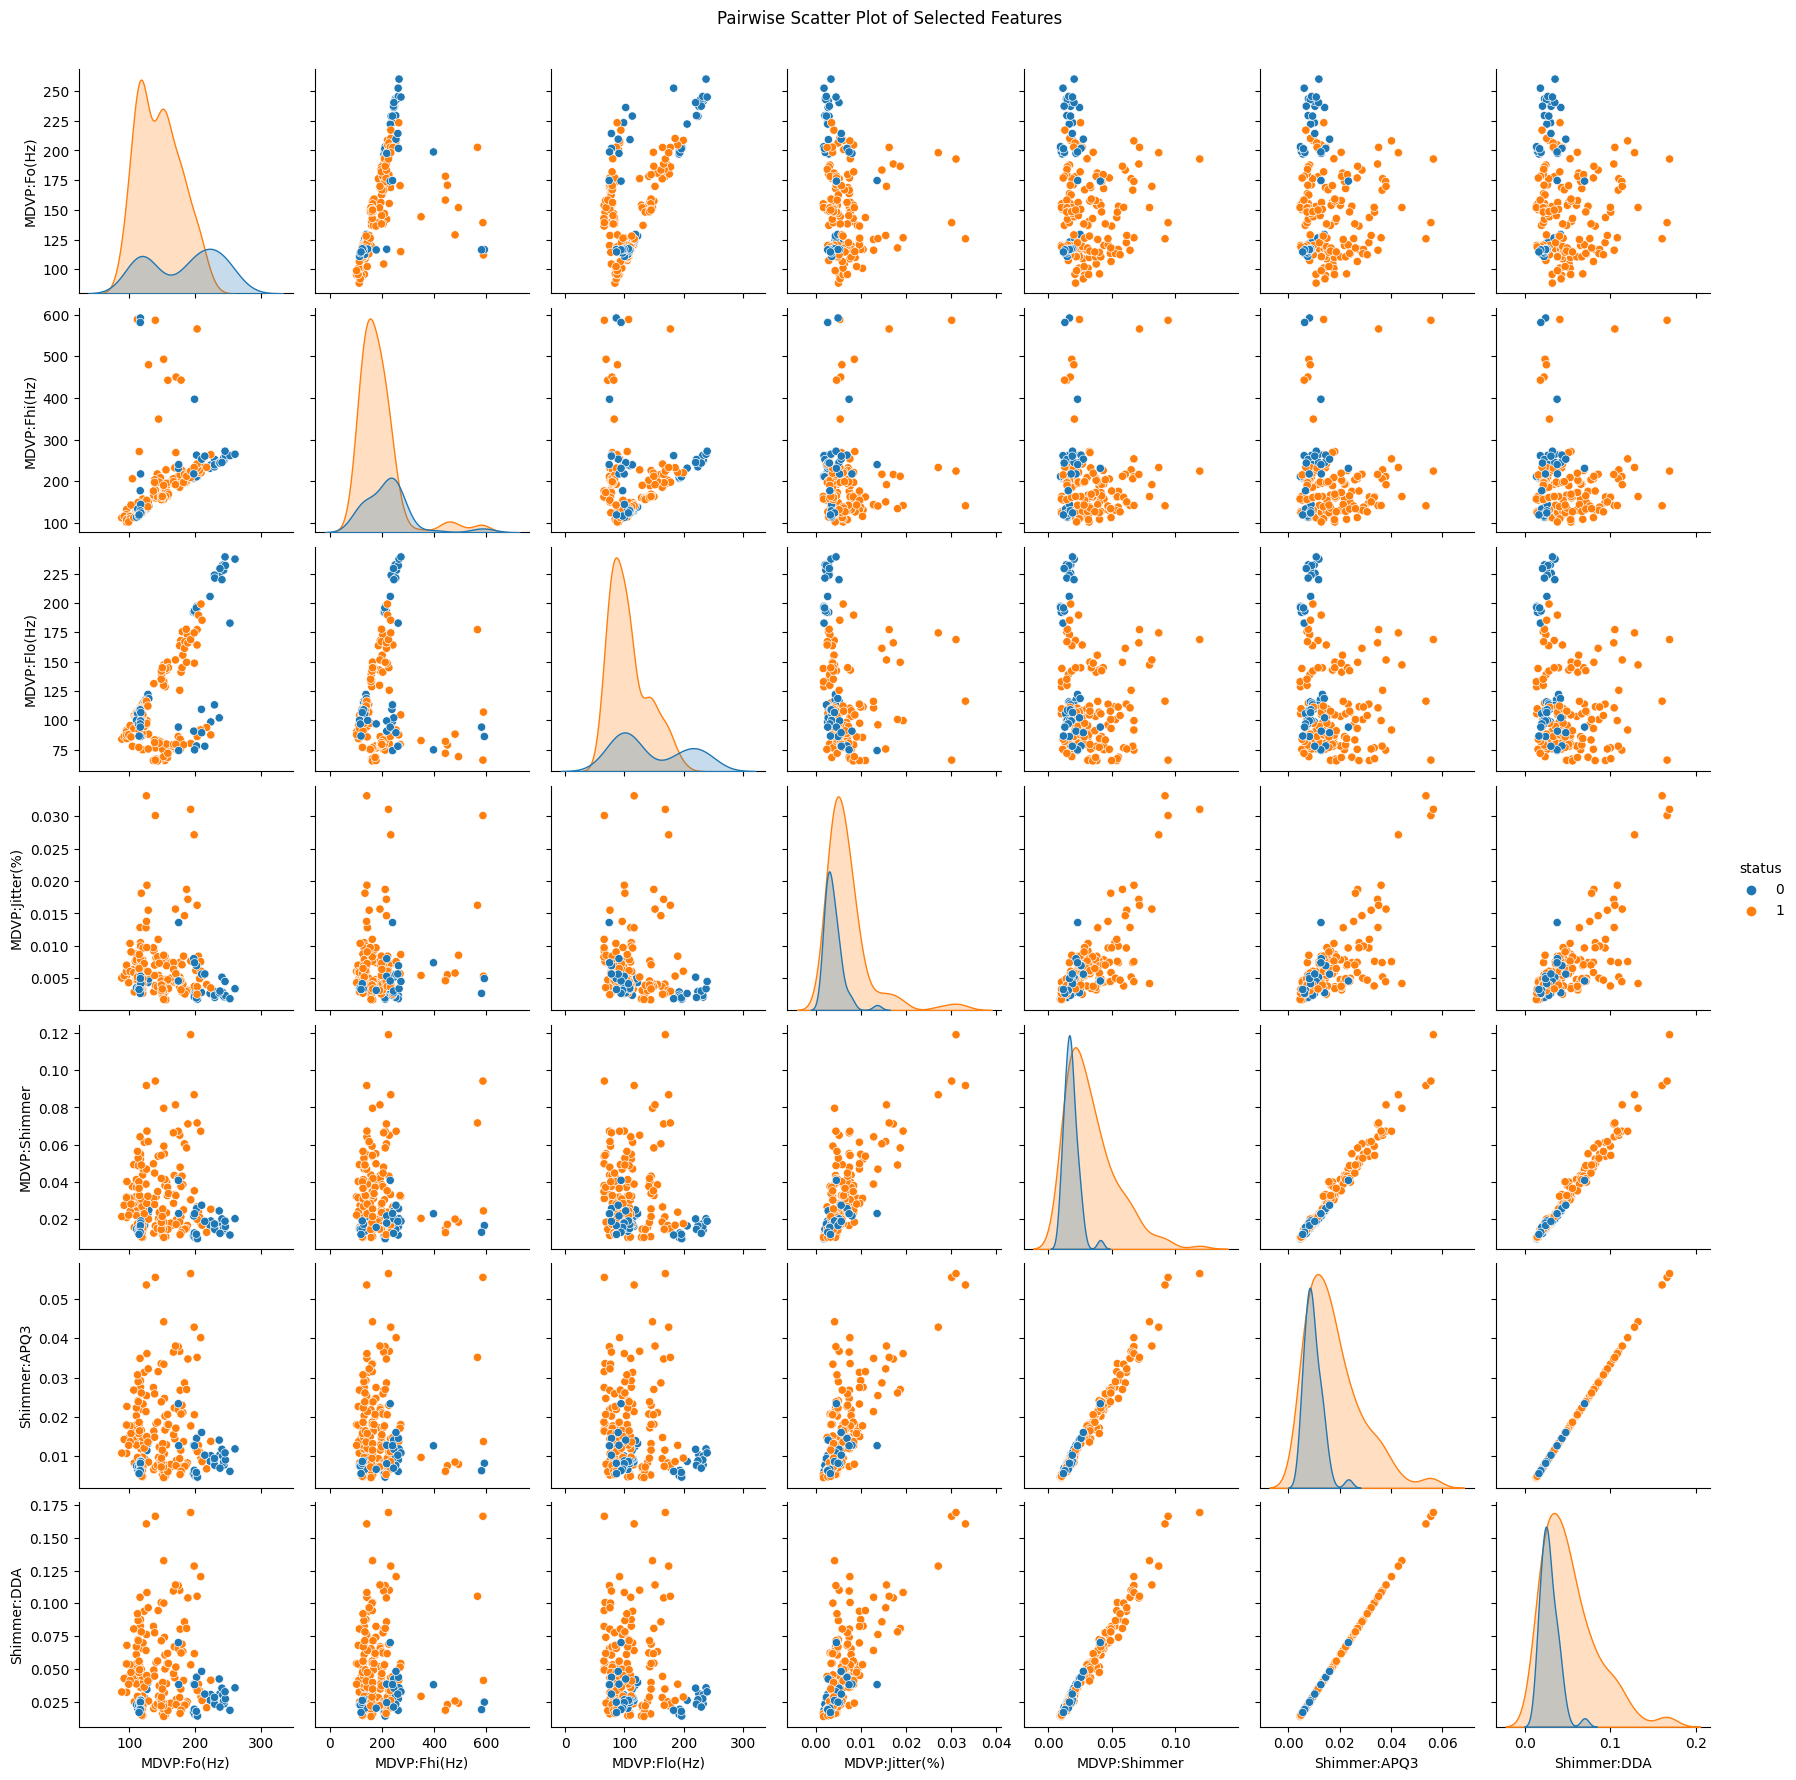

In [3]:
selected_features = ['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 'MDVP:Shimmer', 'Shimmer:APQ3', 'Shimmer:DDA']
sns.pairplot(data, vars=selected_features, hue='status', diag_kind='kde')
plt.suptitle('Pairwise Scatter Plot of Selected Features', y=1.02)
plt.show()


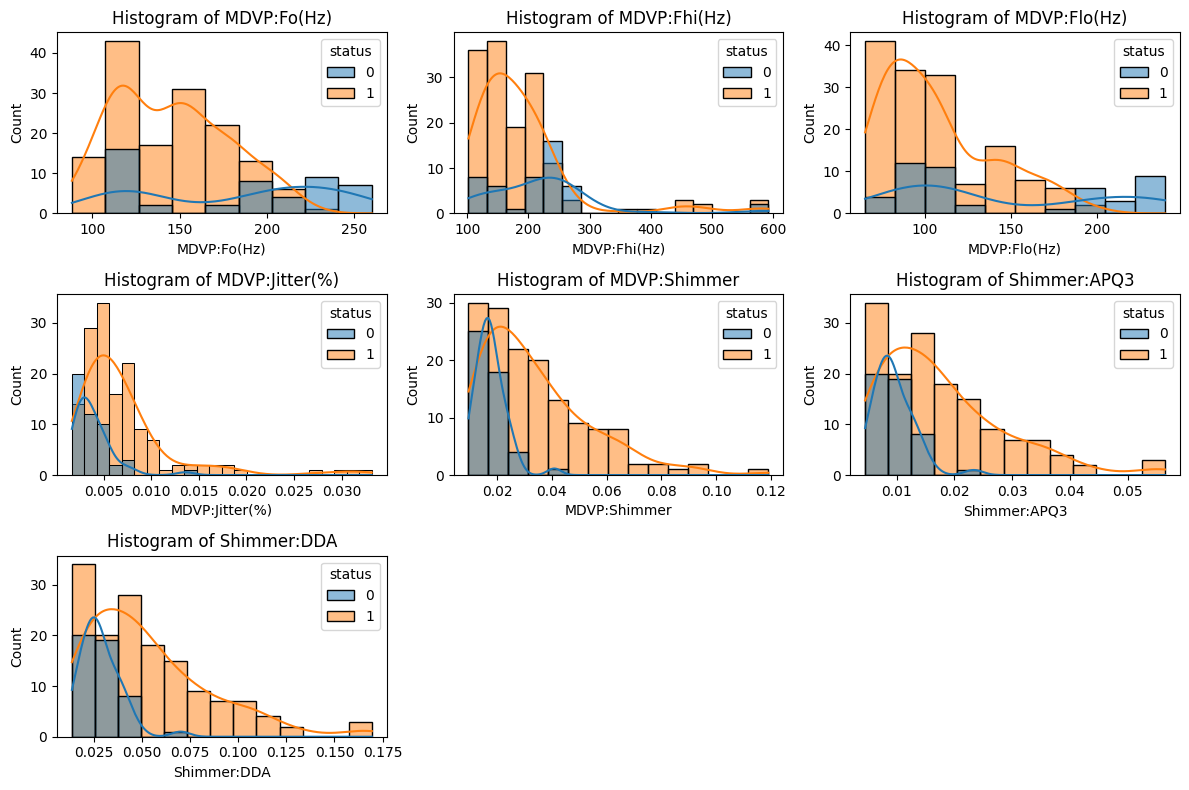

In [4]:
plt.figure(figsize=(12, 8))
for i, feature in enumerate(selected_features, start=1):
    plt.subplot(3, 3, i)
    sns.histplot(data=data, x=feature, hue='status', kde=True)
    plt.title(f'Histogram of {feature}')
plt.tight_layout()
plt.show()

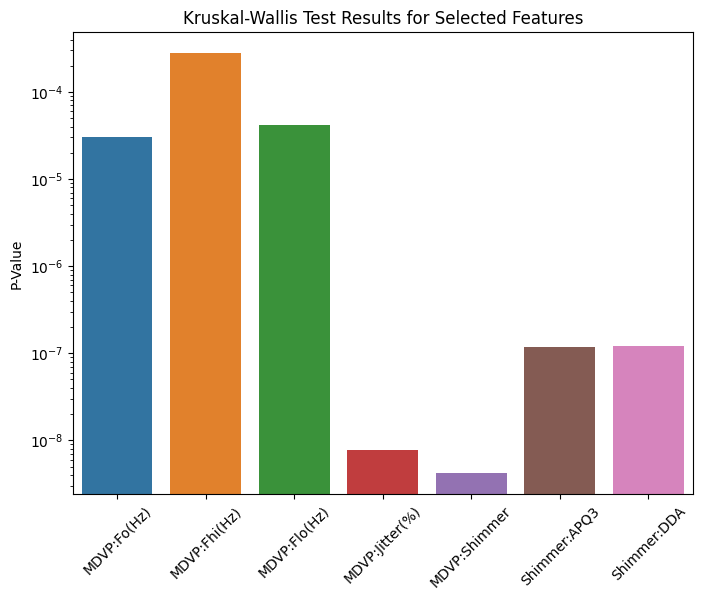

In [5]:
kruskal_results = {}
for feature in selected_features:
    class_0 = data[data['status'] == 0][feature]
    class_1 = data[data['status'] == 1][feature]
    _, p_value = kruskal(class_0, class_1)
    kruskal_results[feature] = p_value
plt.figure(figsize=(8, 6))
sns.barplot(x=list(kruskal_results.keys()), y=list(kruskal_results.values()))
plt.xticks(rotation=45)
plt.title('Kruskal-Wallis Test Results for Selected Features')
plt.ylabel('P-Value')
plt.yscale('log')
plt.show()

In [6]:
X = data.drop(['name','status'], axis = 1)
y = data['status']

In [7]:
print(X.shape)
print(y.shape)

(195, 22)
(195,)


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
std_scl = StandardScaler()
X_train_scl = std_scl.fit_transform(X_train)
X_test_scl = std_scl.transform(X_test)

In [9]:
print(X_train_scl.shape)
print(y_train.shape)
print(X_test_scl.shape)
print(y_test.shape)

(156, 22)
(156,)
(39, 22)
(39,)


In [10]:
X_train_scl[:5]

array([[-8.01728723e-01, -7.08305130e-01, -1.06033035e-01,
         6.82895789e-01,  9.98632838e-01,  4.29498993e-01,
         1.35876533e+00,  4.28358649e-01,  8.52202262e-01,
         8.20883120e-01,  7.00875570e-01,  1.33475296e+00,
         4.43796807e-01,  7.01193025e-01, -3.00025574e-01,
        -1.22185281e-01, -7.62624905e-01,  1.88453324e+00,
         1.35367783e+00,  8.98542807e-01, -4.82941968e-01,
         1.64980971e+00],
       [-1.04374224e+00, -7.49504315e-01, -2.99199214e-01,
        -2.25731379e-01, -8.37831615e-02, -2.55150298e-01,
        -9.59980932e-02, -2.56283067e-01,  5.63407097e-01,
         4.48115540e-01,  6.07699801e-01,  6.01423979e-01,
         4.84458454e-01,  6.08015958e-01,  1.48766168e-03,
        -8.98580047e-01,  1.49469133e+00, -2.82487646e-01,
         3.73667493e-01,  1.17531845e+00,  6.51777407e-01,
         2.68643126e-01],
       [-3.79049804e-01,  1.31225440e-01, -8.20393618e-01,
         1.76824961e-01,  1.86820838e-01,  2.51302602e-01,
    

In [11]:
model = Sequential([
    Dense(128, activation = 'relu', kernel_regularizer=l2(0.01), input_shape=(X_train_scl.shape[1],)),
    #Dropout(0.2),
    Dense(64, activation = 'relu', kernel_regularizer=l2(0.01)),
    Dropout(0.2),
    Dense(32,activation = 'relu', kernel_regularizer=l2(0.01)),
    Dropout(0.2),
    Dense(16,activation = 'relu', kernel_regularizer=l2(0.01)),
    Dropout(0.2),
    Dense(1,activation= 'sigmoid')
])

In [12]:
model.compile(
optimizer = 'adam',
loss= 'binary_crossentropy',
metrics = ['accuracy']
)


In [13]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [14]:
f_Hty = model.fit(X_train_scl, y_train, epochs = 50, batch_size = 32, validation_split = 0.2, callbacks = [early_stopping])

Epoch 1/50
4/4 [==============================] - 1s 80ms/step - loss: 2.5771 - accuracy: 0.5161 - val_loss: 2.5183 - val_accuracy: 0.4688
Epoch 2/50
4/4 [==============================] - 0s 13ms/step - loss: 2.4519 - accuracy: 0.6532 - val_loss: 2.3780 - val_accuracy: 0.7500
Epoch 3/50
4/4 [==============================] - 0s 13ms/step - loss: 2.3609 - accuracy: 0.7097 - val_loss: 2.2640 - val_accuracy: 0.7188
Epoch 4/50
4/4 [==============================] - 0s 13ms/step - loss: 2.2660 - accuracy: 0.7742 - val_loss: 2.1652 - val_accuracy: 0.7188
Epoch 5/50
4/4 [==============================] - 0s 16ms/step - loss: 2.1817 - accuracy: 0.8629 - val_loss: 2.0740 - val_accuracy: 0.7500
Epoch 6/50
4/4 [==============================] - 0s 13ms/step - loss: 2.0867 - accuracy: 0.8306 - val_loss: 1.9860 - val_accuracy: 0.7812
Epoch 7/50
4/4 [==============================] - 0s 13ms/step - loss: 1.9961 - accuracy: 0.8145 - val_loss: 1.9064 - val_accuracy: 0.7812
Epoch 8/50
4/4 [===========

In [15]:
y_probability = model.predict(X_test_scl)
y_predict = (y_probability > 0.5).astype(int)

2/2 [==============================] - 0s 8ms/step


In [16]:
accuracy = accuracy_score(y_test, y_predict)
report = classification_report(y_test, y_predict)
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

Accuracy: 0.9230769230769231
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.57      0.73         7
           1       0.91      1.00      0.96        32

    accuracy                           0.92        39
   macro avg       0.96      0.79      0.84        39
weighted avg       0.93      0.92      0.91        39



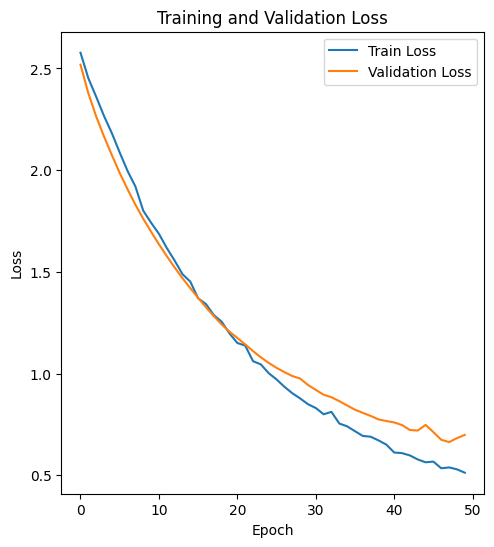

In [17]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(f_Hty.history['loss'], label='Train Loss')
plt.plot(f_Hty.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

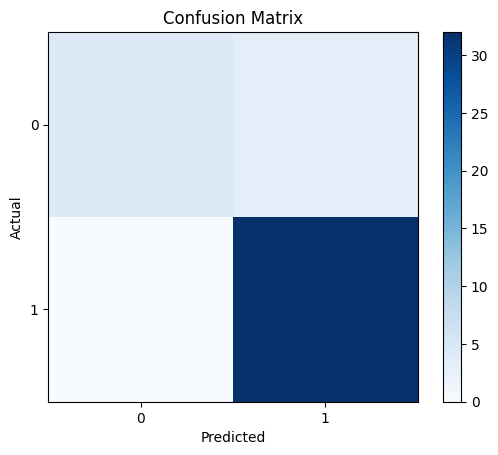

In [18]:
cm = confusion_matrix(y_test, y_predict)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(np.unique(y)))
plt.xticks(tick_marks, np.unique(y))
plt.yticks(tick_marks, np.unique(y))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [21]:
model.save('model.h5')

loaded_model = tf.keras.models.load_model('model.h5')
